In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D1-Cristina/S3/Office_Cristina-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),24):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+24, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (239, 24, 1)
y_train.shape =  (239, 24)
X_test.shape =  (29, 24, 1)
y_test.shape =  (29, 24)


In [11]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [12]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(24))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1176      
                                                                 
Total params: 6,168
Trainable params: 6,168
Non-trainable params: 0
_________________________________________________________________


In [13]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="MSE")

In [14]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
2/2 [==============================] - 4s 27ms/step - loss: 12.0272
Epoch 2/300
2/2 [==============================] - 0s 29ms/step - loss: 11.7063
Epoch 3/300
2/2 [==============================] - 0s 25ms/step - loss: 11.3797
Epoch 4/300
2/2 [==============================] - 0s 23ms/step - loss: 11.0566
Epoch 5/300
2/2 [==============================] - 0s 24ms/step - loss: 10.7312
Epoch 6/300
2/2 [==============================] - 0s 24ms/step - loss: 10.3949
Epoch 7/300
2/2 [==============================] - 0s 24ms/step - loss: 10.0581
Epoch 8/300
2/2 [==============================] - 0s 36ms/step - loss: 9.7051
Epoch 9/300
2/2 [==============================] - 0s 21ms/step - loss: 9.3467
Epoch 10/300
2/2 [==============================] - 0s 26ms/step - loss: 8.9810
Epoch 11/300
2/2 [==============================] - 0s 25ms/step - loss: 8.6034
Epoch 12/300
2/2 [==============================] - 0s 22ms/step - loss: 8.2194
Epoch 13/300
2/2 [========================

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 0.813421692330886
RMSE for BiLSTM Model for testing is: 0.8195655731212395
MAE for BiLSTM Model for training is: 0.6288340927107584
MAE for BiLSTM Model for testing is: 0.6261087222821281
MAPE for BiLSTM Model for training is: 0.2236323146732795
MAPE for BiLSTM Model for testing is: 0.26417508922801924


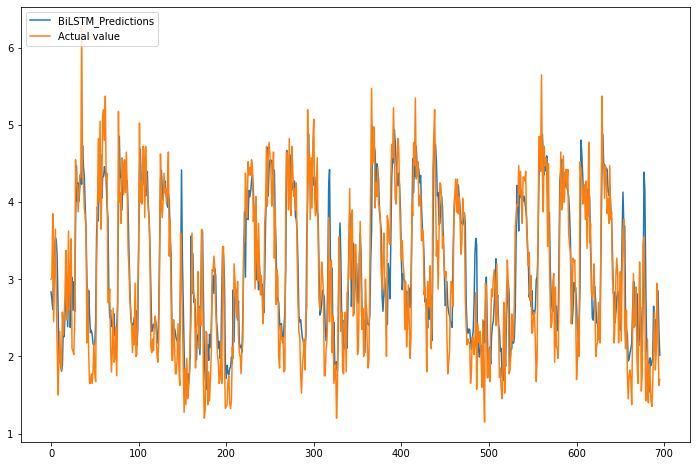

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([3.]), array([2.8373935], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.16260648]), array([0.28143144]), array([1.24095798]), array([-0.71794939]), array([-0.37522387]), array([0.11160207]), array([-0.7349751]), array([-1.200351]), array([-1.18457437]), array([-0.08694673]), array([0.39821231]), array([-0.0058372]), array([0.01595247]), array([0.69176555]), array([-0.09062266]), array([0.24366808]), array([0.2555387]), array([0.67537045]), array([-0.54958868]), array([0.43882298]), array([0.74132562]), array([-0.57902265]), array([0.64969444]), array([0.73982167]), array([-0.92499375]), array([-0.52297258]), array([-0.94523048]), array([-0.15570211]), array([0.86257911]), array([-0.2494216]), array([0.21041632]), array([-0.37396336]), array([0.11456203]), array([0.12947416]), array([-0.04804754]), array([2.04165792]), array([-0.33802986]), array([-0.18674898]), array([-0.41173267]), array([-0.13162613]), array([0.00656056]), array([-0.83426905]), array([0.57469487]), array([-0.80444765]), array([-0.8805449]), array([-0.65850198]), array([-0.56491

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.04165792]), array([-1.97213817]))

In [ ]:
max(d1)-min(d1)

array([4.01379609])

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(405, 291)